# Import


In [ ]:
# imports
import pandas as pd
import numpy as np
import librosa
import librosa.display

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks')

import IPython.display as ipd
from IPython.display import Audio


# Explore audio manipulation on an audio sample

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# load audio file in librosa
path = "/content/gdrive/MyDrive/guit_data/audio/"
data, sr = librosa.load(path + "00_Jazz3-150-C_solo_hex_cln.wav")

In [ ]:
# listen to audio file
Audio(data=data, rate=sr)

In [ ]:
# get length of audio sample - number of frames?
len(data)

564480

In [ ]:
# samplig rate
print(sr)

22050


In [ ]:
# get length (in seconds) of audio file
print('length:', len(data)/sr)

length: 25.6


In [ ]:
# hop length and minimum frequency
fmin = librosa.midi_to_hz(36)
hop_length = 512

In [ ]:
# sample first two seconds by using time
data, sr = librosa.load(path + "00_Jazz3-150-C_solo_hex_cln.wav", duration=2)
Audio(data=data, rate=sr)

In [ ]:
# sample first two seconds by using frames
data, sr = librosa.load(path + "00_Jazz3-150-C_solo_hex_cln.wav")
frames_total = len(data)
length_audio = len(data)/sr
frames_2sec = 2*sr


NameError: ignored

In [ ]:
ipd.Audio(data[0:frames_2sec], rate=sr)

### Waveplot

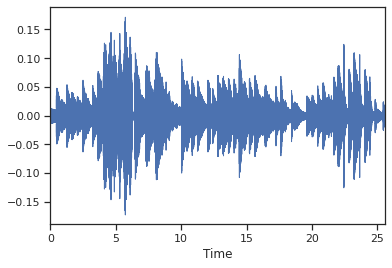

In [ ]:
# display waveplot
librosa.display.waveplot(data, sr)

### Short term fourrier transform

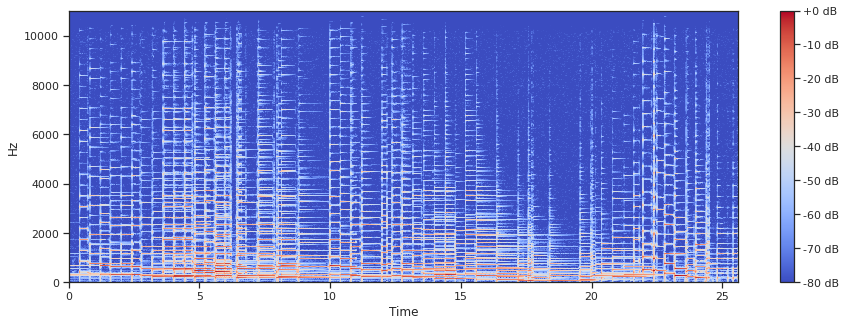

In [ ]:
# linear on y axis
S_linear = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(S_linear, sr=sr, x_axis = 'time', y_axis='linear', fmin=fmin, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

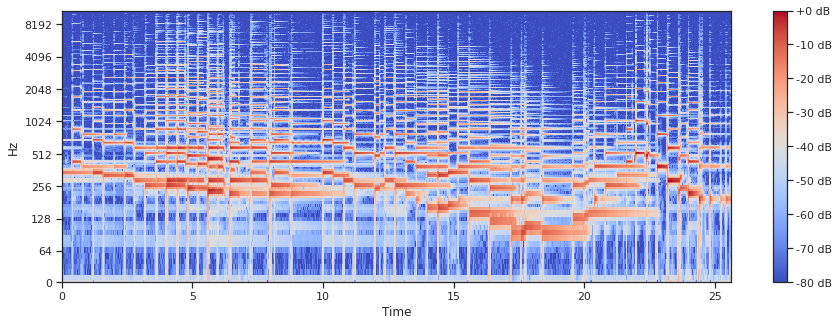

In [ ]:
# logarythmic on y axis
S_log = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(S_linear, sr=sr, x_axis = 'time', y_axis='log', fmin=fmin, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

### Constant Q transform
This uses a logarythmic spaced frequency axis (the higher the frequency, the bigger the frequency differences between notes for the human ear)

In [ ]:
# Apply constant Q transform 
C = librosa.cqt(data, sr, fmin=fmin, n_bins=72, hop_length=hop_length)
logC = librosa.amplitude_to_db(np.abs(C))

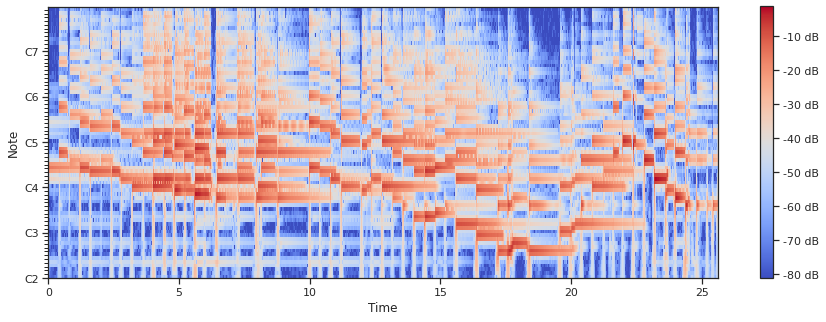

In [ ]:
# display
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

Each frequency bin corresponds to one MIDI pitch number
### Chromagrams
A chroma vector is a 12 element feature vector indicating how much energy of each pitch class is present. Chroma representations don’t have a fixed frequency axis, and instead aggregate information across all frequencies corresponding to a given pitch class. 

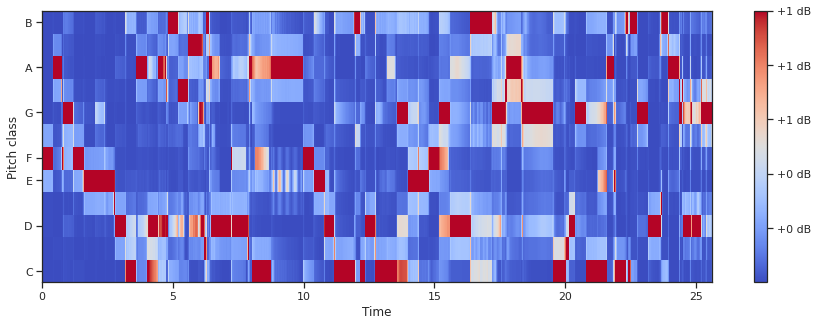

In [ ]:
# Chroma stft
chromagram = librosa.feature.chroma_stft(data, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

In [ ]:
chromagram.shape

(12, 1103)

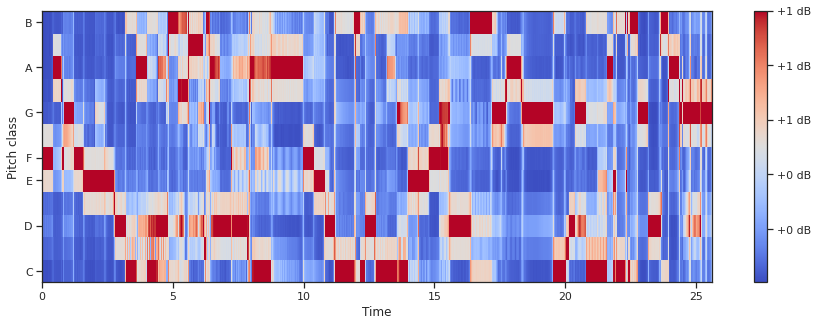

In [ ]:
# chroma cqt
chromagram = librosa.feature.chroma_cqt(data, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

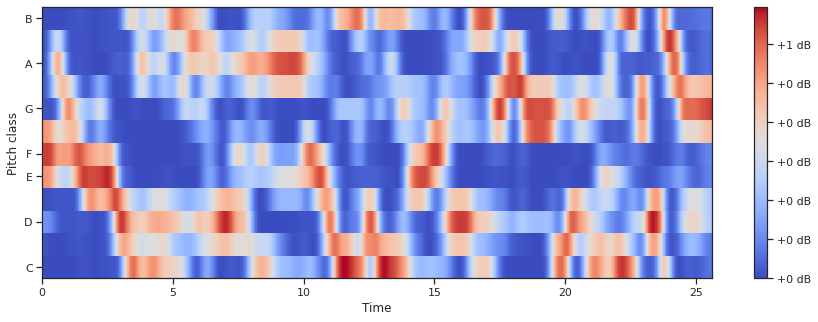

In [ ]:
# chroma cens
#The main idea of CENS features is that taking statistics over large windows smooths local deviations in tempo, 
#articulation, and musical ornaments such as trills and arpeggiated chords. CENS are best used for tasks such as audio matching and similarity.
chromagram = librosa.feature.chroma_cens(data, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

### Chroma vectors

In [ ]:
pip install madmom

In [ ]:
from madmom.audio.chroma import DeepChromaProcessor
dcp = DeepChromaProcessor()
chroma_vect = dcp(path + "00_Jazz3-150-C_solo_hex_cln.wav")
chroma_vect

array([[0.03792084, 0.0248572 , 0.15343818, ..., 0.141133  , 0.04573916,
        0.01914634],
       [0.0529005 , 0.02456632, 0.23303466, ..., 0.17353614, 0.07487272,
        0.01955391],
       [0.0788779 , 0.02280669, 0.3489815 , ..., 0.21853094, 0.12036823,
        0.02083813],
       ...,
       [0.23134805, 0.02399503, 0.53507817, ..., 0.13700204, 0.05622969,
        0.35636112],
       [0.24558978, 0.02746439, 0.49124765, ..., 0.15071808, 0.05541066,
        0.33281597],
       [0.22862314, 0.03295105, 0.4465518 , ..., 0.15320578, 0.06133297,
        0.29271588]], dtype=float32)

In [ ]:
chroma_vect.shape

(256, 12)

In [ ]:
# Why 256?

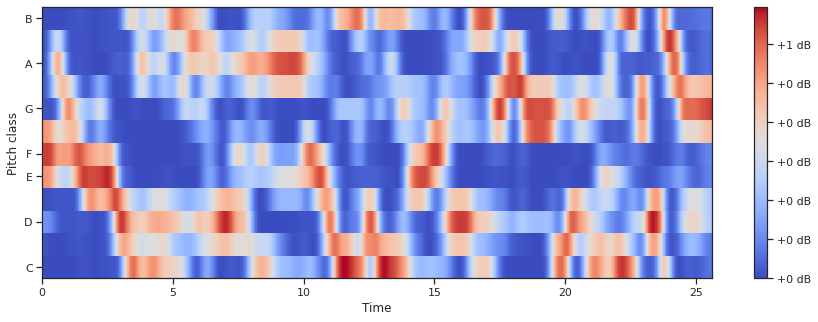

In [ ]:
data, sr = librosa.load(path + "00_Jazz3-150-C_solo_hex_cln.wav")
chromagram = librosa.feature.chroma_cens(data, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

In [ ]:
data.shape

(564480,)

### Detect onsets
Find times (in seconds) when onsets occur in audio signal

In [ ]:
data, sr = librosa.load(path + "00_Jazz3-150-C_solo_hex_cln.wav")

In [ ]:
# onset frames - returns frame numbers of estimated onsets
onset_frames = librosa.onset.onset_detect(data, sr=sr)
print(onset_frames)

[  19   33   36   53   71   88  105  119  122  139  157  174  192  205
  209  226  242  259  278  313  344  352  380  432  448  466  484  517
  525  534  549  551  568  586  604  622  639  655  673  707  742  758
  764  794  844  862  870  879  897  916  932  942  947  962  965  970
  983  999 1018 1034 1051 1069 1087 1096]


In [ ]:
# onset times in seconds
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
onset_times

array([ 0.44117914,  0.7662585 ,  0.83591837,  1.2306576 ,  1.64861678,
        2.04335601,  2.43809524,  2.7631746 ,  2.83283447,  3.2275737 ,
        3.64553288,  4.04027211,  4.45823129,  4.7600907 ,  4.85297052,
        5.24770975,  5.61922902,  6.01396825,  6.45514739,  7.2678458 ,
        7.9876644 ,  8.17342404,  8.82358277, 10.03102041, 10.40253968,
       10.82049887, 11.23845805, 12.00471655, 12.19047619, 12.39945578,
       12.7477551 , 12.79419501, 13.18893424, 13.60689342, 14.02485261,
       14.44281179, 14.83755102, 15.20907029, 15.62702948, 16.41650794,
       17.22920635, 17.60072562, 17.74004535, 18.43664399, 19.59764172,
       20.01560091, 20.20136054, 20.41034014, 20.82829932, 21.26947846,
       21.64099773, 21.87319728, 21.98929705, 22.33759637, 22.40725624,
       22.52335601, 22.82521542, 23.19673469, 23.63791383, 24.00943311,
       24.40417234, 24.82213152, 25.2400907 , 25.44907029])

In [ ]:
# convert onset times to sample indices
onset_samples = librosa.frames_to_samples(onset_frames)
print(onset_samples)

[  9728  16896  18432  27136  36352  45056  53760  60928  62464  71168
  80384  89088  98304 104960 107008 115712 123904 132608 142336 160256
 176128 180224 194560 221184 229376 238592 247808 264704 268800 273408
 281088 282112 290816 300032 309248 318464 327168 335360 344576 361984
 379904 388096 391168 406528 432128 441344 445440 450048 459264 468992
 477184 482304 484864 492544 494080 496640 503296 511488 521216 529408
 538112 547328 556544 561152]


In [ ]:
# play 'beep' at each onset
# Use the `length` parameter so the click track is the same length as the original signal
clicks = librosa.clicks(times=onset_times, length=len(data))

In [ ]:
# Play the click track "added to" the original signal
ipd.Audio(data+clicks, rate=sr)

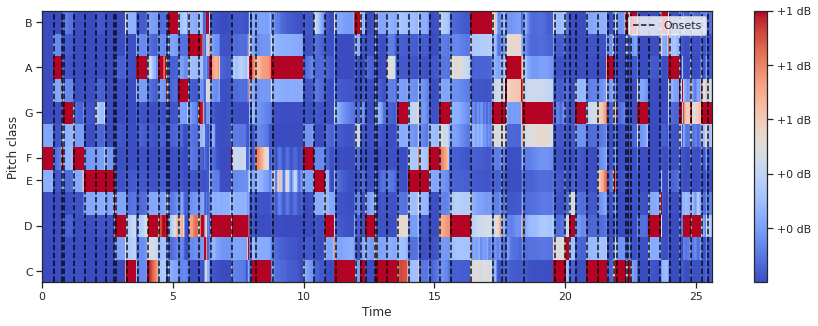

In [ ]:
# plot onset on top of chromagram stft

chromagram = librosa.feature.chroma_stft(data, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

plt.vlines(onset_times, 0, 12, color='black', alpha=0.9,
linestyle='--', label='Onsets')
plt.legend()

## Segment audio
Save into an array, segments, 100-ms segments beginning at each onset.

In [ ]:
frame_sz = int(0.100*sr)
segments = np.array([data[i:i+frame_sz] for i in onset_samples])

In [ ]:
segments[0]

array([0.00966657, 0.01276199, 0.01128954, ..., 0.02104075, 0.02105981,
       0.01673683], dtype=float32)

In [ ]:
# first note
ipd.Audio(segments[0], rate=sr)

In [ ]:
# second note
ipd.Audio(segments[1], rate=sr)

In [ ]:
# function that adds 300 ms of silence onto end of segment and concatenates them into one signal
def concatenate_segments(segments, sr=22050, pad_time=0.300):
    padded_segments = [np.concatenate([segment, np.zeros(int(pad_time*sr))]) for segment in segments]
    return np.concatenate(padded_segments)

In [ ]:
concatenated_signal = concatenate_segments(segments, sr)
print('Raw data length: ',len(data))
print('Conactenated_signal length: ', len(concatenated_signal))

Raw data length:  564480
Conactenated_signal length:  564480


In [ ]:
ipd.Audio(concatenated_signal, rate=sr)

## Extract features
Compute zero crossing rate for each segment
Use argsort to find an index array, ind, such that segments[ind] is sorted by zero crossing rate.

In [ ]:
# compute zero crossing rate
zcrs = [sum(librosa.core.zero_crossings(segment)) for segment in segments]
print(zcrs)

[165, 141, 229, 140, 157, 151, 211, 147, 205, 99, 304, 163, 267, 112, 151, 241, 186, 207, 152, 242, 191, 148, 161, 196, 233, 133, 288, 374, 155, 298, 237, 260, 159, 120, 120, 158, 75, 165, 144, 87, 68, 86, 53, 68, 78, 63, 73, 104, 116, 79, 147, 83, 162, 140, 115, 138, 140, 202, 82, 154, 103, 131, 53, 78]


In [ ]:
# sort index arrays by zero crossing rate
ind = np.argsort(zcrs)
print(ind)

[62 42 45 43 40 46 36 44 63 49 58 51 41 39  9 60 47 13 54 48 33 34 61 25
 55 53 56  3  1 38  7 50 21 14  5 18 59 28  4 35 32 22 52 11  0 37 16 20
 23 57  8 17  6  2 24 30 15 19 31 12 26 29 10 27]


In [ ]:
# sort segments, concatenate and listen
concatenated_signal = concatenate_segments(segments[ind], sr)
ipd.Audio(concatenated_signal, rate=sr)

## Segment chromagrams (one per onset time with a 0.2 sec duration)



In [ ]:
chromagrams = []
for start in onset_times:
  data, sr = librosa.load(path + "00_Jazz3-150-C_solo_hex_cln.wav", mono = True, offset = start, duration = 0.2)
  chromagram = librosa.feature.chroma_stft(data, sr=sr, hop_length=512)
  chromagrams.append(chromagram)

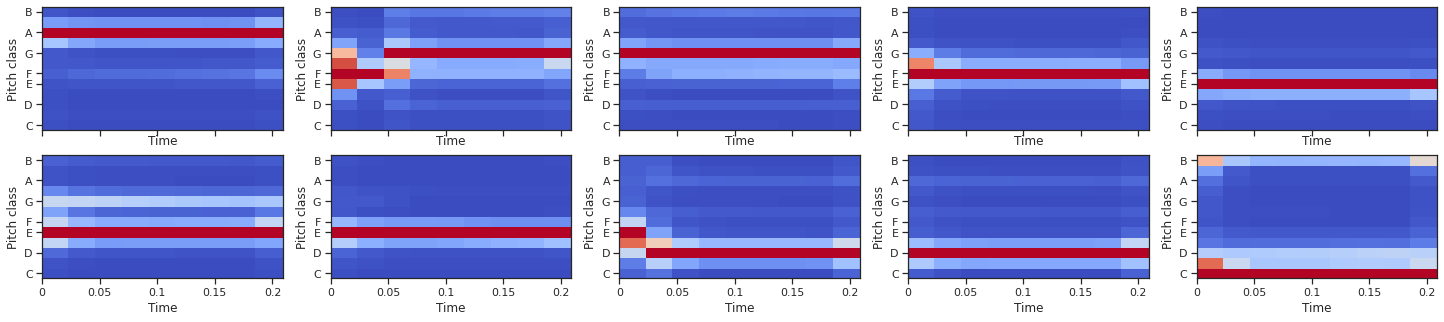

In [ ]:
# plot chromagrams
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, figsize = (25,5))
librosa.display.specshow(chromagrams[0], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,0])
librosa.display.specshow(chromagrams[1], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,1])
librosa.display.specshow(chromagrams[2], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,2])
librosa.display.specshow(chromagrams[3], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,3])
librosa.display.specshow(chromagrams[4], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,4])
librosa.display.specshow(chromagrams[5], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,0])
librosa.display.specshow(chromagrams[6], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,1])
librosa.display.specshow(chromagrams[7], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,2])
librosa.display.specshow(chromagrams[8], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,3])
librosa.display.specshow(chromagrams[9], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,4])


Notes: Here there can be two chors in the 0.2 time frame. it would be better to have one picture with start = onset and duration = duration until next onset. Then I could slice it horizontally in the middle with one pixel of width and us this for the network

## Segment chromagrams (one per onset time with with custom duration)
The duration will be: duration between two onsets

In [ ]:
starts = onset_times[0:-1]
stops = onset_times[1:]

chromagrams = []
for i, start in enumerate(starts):
  dur = stops[i]-starts[i]
  data, sr = librosa.load(path + "00_Jazz3-150-C_solo_hex_cln.wav", mono = True, offset = start, duration = dur)
  chromagram = librosa.feature.chroma_stft(data, sr=sr, hop_length=512)
  chromagrams.append(chromagram)

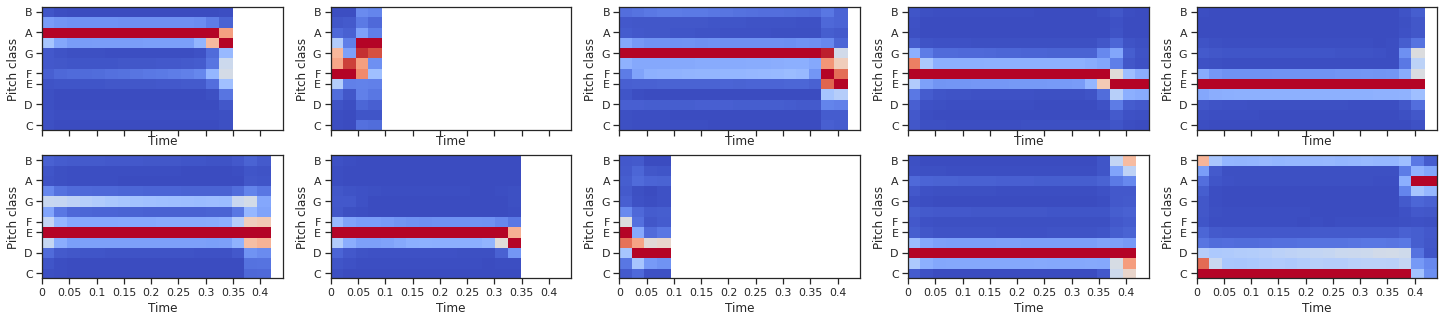

In [ ]:
# plot chromagrams
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, figsize = (25,5))
librosa.display.specshow(chromagrams[0], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,0])
librosa.display.specshow(chromagrams[1], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,1])
librosa.display.specshow(chromagrams[2], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,2])
librosa.display.specshow(chromagrams[3], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,3])
librosa.display.specshow(chromagrams[4], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[0,4])
librosa.display.specshow(chromagrams[5], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,0])
librosa.display.specshow(chromagrams[6], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,1])
librosa.display.specshow(chromagrams[7], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,2])
librosa.display.specshow(chromagrams[8], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,3])
librosa.display.specshow(chromagrams[9], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm', ax=ax[1,4])

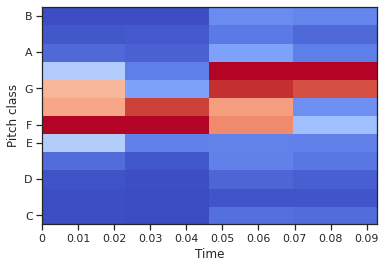

In [ ]:
librosa.display.specshow(chromagrams[1], sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

It looks like in the display with several images, all the x asis have the same range. But the chromagrams have different lengths. This gives a better representation of each individual note. I could be slicing through an horizzontal line to get the picture to feed the NN (probably in the middle)

## Chroma on concatented_signal (with silences added)
Notes: this signal is longer than the original one

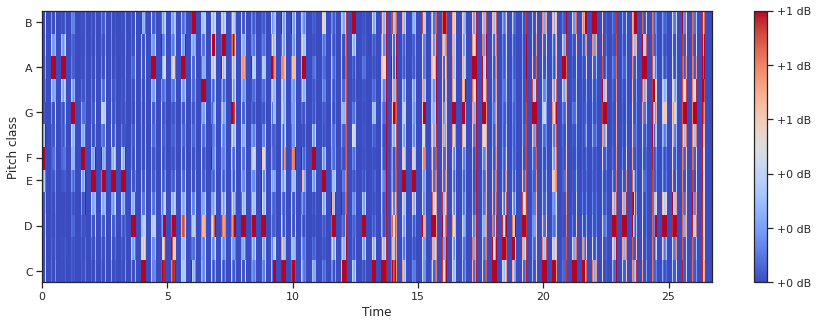

In [ ]:
# Chroma cqt
chromagram = librosa.feature.chroma_stft(concatenated_signal, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

## Random

In [ ]:
# apply constant Q transform
path = "/content/gdrive/MyDrive/guit_data/audio/"
audio_file = os.listdir(path)
audio_path = os.path.join(path, audio_file[1])

## Explore jams data
They will be coming frommthe midi files

In [ ]:
pip install mido

     |████████████████████████████████| 61kB 3.2MB/s 


In [ ]:
pip install jams

In [ ]:
import jams
path = "/content/gdrive/MyDrive/guit_data/annotations/"
jams = jams.load(path + "00_Jazz3-150-C_solo.jams")

In [ ]:
len(jams['annotations'])

17

In [ ]:
# recover relevant information from the jams file
# print only midi related info
midi_data = []
for i in range(0, len(jams['annotations'])):
  if jams['annotations'][int(i)]['namespace'] == 'note_midi':
    midi_data.append(jams['annotations'][int(i)])

In [ ]:
len(midi_data)

6

In [ ]:
for observation in midi_data[0]['data']:
  print(observation)

Observation(time=17.21793287981859, duration=0.37732426303853117, value=43.072101801233345, confidence=None)
Observation(time=17.59908934240366, duration=0.121904761904716, value=43.075166542465915, confidence=None)
Observation(time=17.726731065759736, duration=0.6385487528344811, value=45.07876021261985, confidence=None)
Observation(time=18.414486167800533, duration=1.6718367346938976, value=42.9838422885973, confidence=None)


In [ ]:
for observation in midi_data[1]['data']:
  print(observation)

In [ ]:
midi_data[0]

In [ ]:
midi_data[1]

In [ ]:
midi_data[2]

Why is there different part of the file containing midi data?

In [ ]:
 jam = jams
 
# Initialize variables
cnt_row = -1
cnt_col = 0
cnt_zero = 0
# making an array with the midi data (time, duration, values)
 for i in range(0, len(jam['annotations'])):
    if jam['annotations'][int(i)]['namespace'] == 'note_midi':
        for j in range(0, len(sorted(jam['annotations'][int(i)]['data']))):
            cnt_row = cnt_row + 1
            for k in range(0, len(sorted(jam['annotations'][int(i)]['data'])[int(j)]) - 1):
                if cnt_zero == 0:
                    MIDI_arr = np.zeros((len(sorted(jam['annotations'][int(i)]['data'])), len(sorted(jam['annotations'][int(i)]['data'])[int(j)]) - 1), dtype = np.float32)
                    cnt_zero = cnt_zero + 1
                if cnt_zero > 0:
                    MIDI_arr = np.vstack((MIDI_arr, np.zeros((len(sorted(jam['annotations'][int(i)]['data'])), len(sorted(jam['annotations'][int(i)]['data'])[int(j)]) - 1), dtype = np.float32)))
                    cnt_zero = cnt_zero + 1  # Keep
                if cnt_col > 2:
                    cnt_col = 0
                MIDI_arr[cnt_row, cnt_col] = sorted(jam['annotations'][int(i)]['data'])[int(j)][int(k)]
                cnt_col = cnt_col + 1
MIDI_dat = np.zeros((cnt_row + 1, cnt_col), dtype = np.float32)
cnt_col2 = 0
for n in range(0, cnt_row + 1):
    for m in range(0, cnt_col):
        if cnt_col2 > 2:
            cnt_col2 = 0
        MIDI_dat[n, cnt_col2] = MIDI_arr[n, cnt_col2]
        cnt_col2 = cnt_col2 + 1

In [ ]:
# see midi array (columns are time, duration, values)
MIDI_dat[:5]

array([[17.217934  ,  0.37732425, 43.0721    ],
       [17.599089  ,  0.12190476, 43.075165  ],
       [17.72673   ,  0.63854873, 45.078762  ],
       [18.414486  ,  1.6718367 , 42.98384   ],
       [ 6.8058014 ,  0.47600907, 57.178234  ]], dtype=float32)

In [ ]:
# print 5 first values for time
sorted(MIDI_dat[:,0])[:5]

[0.017229931, 0.4376381, 0.50775146, 0.828976, 1.2283638]

In [ ]:
# print 5 first onset values
onset_times[:5]

array([0.44117914, 0.7662585 , 0.83591837, 1.2306576 , 1.64861678])

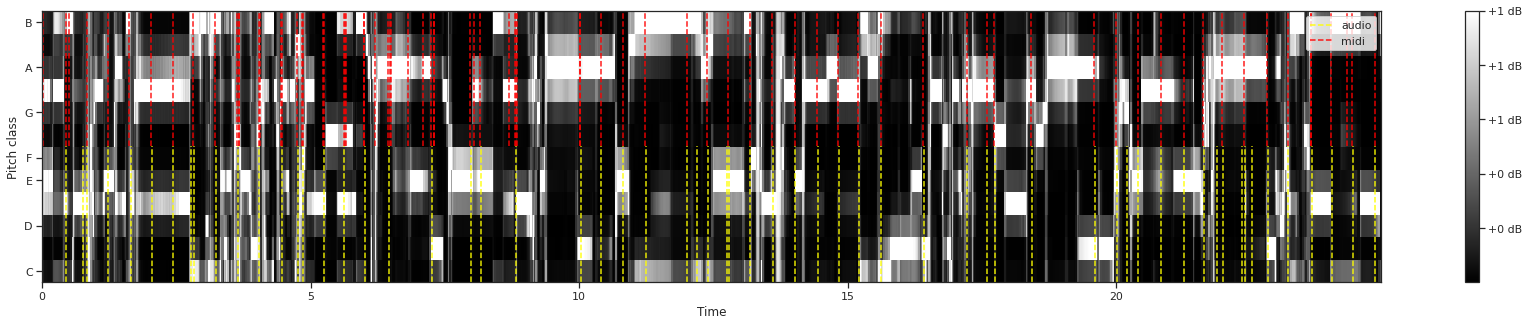

In [ ]:
# compare data from midi files to data from audio

chromagram = librosa.feature.chroma_stft(data, sr=sr, hop_length=hop_length)
fig = plt.figure(figsize=(30, 5))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='gray')
plt.colorbar(format='%+2.0f dB')
plt.vlines(onset_times, 0, 6, color='yellow', alpha=0.9, linestyle='--', label='audio')
plt.vlines(sorted(MIDI_dat[:, 0]), 6, 12, color='red', alpha=0.9, linestyle='--', label='midi')
plt.legend()
fig.savefig("/content/gdrive/MyDrive/guit_data/tests/image.png")

Overall there seems to be more notes in the midi files, although the onset function in librosa also have some additional onsets at times.

## More exploration

In [ ]:
starts = onset_times[0:-1]
stops = onset_times[1:]
# Return the unique MIDI notes played (available in MIDI_dat)

for i, start in enumerate(starts):
#  dur = stops[i]-starts[i]
  stop = stops[i]
  MIDI_dat_dur = np.copy(MIDI_dat)
  for r in range(0, len(MIDI_dat[:, 0])):
      MIDI_dat_dur[r, 0] = MIDI_dat[r, 0] + MIDI_dat[r, 1]
  tab_1, = np.where(np.logical_and(MIDI_dat[:, 0] >= start, MIDI_dat[:, 0] <= stop))
  tab_2, = np.where(np.logical_and(MIDI_dat_dur[:, 0] >= start, MIDI_dat_dur[:, 0] <= stop))
  tab_3, = np.where(np.logical_and(np.logical_and(MIDI_dat[:, 0] < start, MIDI_dat_dur[:, 0] > stop), MIDI_dat[:, 1] > int(stop-start)))
  if tab_1.size != 0 and tab_2.size == 0 and tab_3.size == 0:
      tab_ind = tab_1
  if tab_1.size == 0 and tab_2.size != 0 and tab_3.size == 0:
      tab_ind = tab_2
  if tab_1.size == 0 and tab_2.size == 0 and tab_3.size != 0:
          tab_ind = tab_3
  if tab_1.size != 0 and tab_2.size != 0 and tab_3.size == 0:
      tab_ind = np.concatenate([tab_1, tab_2])
  if tab_1.size != 0 and tab_2.size == 0 and tab_3.size != 0:
      tab_ind = np.concatenate([tab_1, tab_3])
  if tab_1.size == 0 and tab_2.size != 0 and tab_3.size != 0:
      tab_ind = np.concatenate([tab_2, tab_3])
  if tab_1.size != 0 and tab_2.size != 0 and tab_3.size != 0:
      tab_ind = np.concatenate([tab_1, tab_2, tab_3])
  if tab_1.size == 0 and tab_2.size == 0 and tab_3.size == 0:
      tab_ind = []
  if len(tab_ind) != 0:
      MIDI_val = np.zeros((len(tab_ind), 1), dtype = np.float32)
      for z in range(0, len(tab_ind)):
          MIDI_val[z, 0] = int(round(MIDI_dat[tab_ind[z], 2]))
  elif len(tab_ind) == 0:
      MIDI_val = []
  MIDI_val = np.unique(MIDI_val)
  if MIDI_val.size >= 6:
      MIDI_val = np.delete(MIDI_val, np.s_[6::])

In [ ]:
start = starts[0]
stop = stops[0]
np.where(np.logical_and(MIDI_dat[:, 0] >= start, MIDI_dat[:, 0] <= stop))

(array([13]),)

In [ ]:
MIDI_dat[:5]

array([[17.217934  ,  0.37732425, 43.0721    ],
       [17.599089  ,  0.12190476, 43.075165  ],
       [17.72673   ,  0.63854873, 45.078762  ],
       [18.414486  ,  1.6718367 , 42.98384   ],
       [ 6.8058014 ,  0.47600907, 57.178234  ]], dtype=float32)

In [ ]:
 # function from the tutorial ---
# Return the unique MIDI notes played (available in MIDI_dat)
MIDI_dat_dur = np.copy(MIDI_dat)
for r in range(0, len(MIDI_dat[:, 0])):
    MIDI_dat_dur[r, 0] = MIDI_dat[r, 0] + MIDI_dat[r, 1]
tab_1, = np.where(np.logical_and(MIDI_dat[:, 0] >= start, MIDI_dat[:, 0] <= stop))
tab_2, = np.where(np.logical_and(MIDI_dat_dur[:, 0] >= start, MIDI_dat_dur[:, 0] <= stop))
tab_3, = np.where(np.logical_and(np.logical_and(MIDI_dat[:, 0] < start, MIDI_dat_dur[:, 0] > stop), MIDI_dat[:, 1] > int(stop-start)))
if tab_1.size != 0 and tab_2.size == 0 and tab_3.size == 0:
    tab_ind = tab_1
if tab_1.size == 0 and tab_2.size != 0 and tab_3.size == 0:
    tab_ind = tab_2
if tab_1.size == 0 and tab_2.size == 0 and tab_3.size != 0:
        tab_ind = tab_3
if tab_1.size != 0 and tab_2.size != 0 and tab_3.size == 0:
    tab_ind = np.concatenate([tab_1, tab_2])
if tab_1.size != 0 and tab_2.size == 0 and tab_3.size != 0:
    tab_ind = np.concatenate([tab_1, tab_3])
if tab_1.size == 0 and tab_2.size != 0 and tab_3.size != 0:
    tab_ind = np.concatenate([tab_2, tab_3])
if tab_1.size != 0 and tab_2.size != 0 and tab_3.size != 0:
    tab_ind = np.concatenate([tab_1, tab_2, tab_3])
if tab_1.size == 0 and tab_2.size == 0 and tab_3.size == 0:
    tab_ind = []
if len(tab_ind) != 0:
    MIDI_val = np.zeros((len(tab_ind), 1), dtype = np.float32)
    for z in range(0, len(tab_ind)):
        MIDI_val[z, 0] = int(round(MIDI_dat[tab_ind[z], 2]))
elif len(tab_ind) == 0:
    MIDI_val = []
MIDI_val = np.unique(MIDI_val)
if MIDI_val.size >= 6:
    MIDI_val = np.delete(MIDI_val, np.s_[6::])

NameError: ignored

# Following along tutorial from towards data science

In [ ]:
import os

#### Create images - Trying things

In [ ]:
# just testing the code

path = "/content/gdrive/MyDrive/guit_data/audio/"
audio_file = os.listdir(path)
audio_path = os.path.join(path, audio_file[1]) # iterate through the 1 number here

data, sr = librosa.load(audio_path)
length = len(data)/sr # length of audio file in seconds
length

24.93201814058957

In [ ]:
def cqt_lim(CQT):
        new_CQT = np.copy(CQT)
        new_CQT[new_CQT < -60] = -120
        return new_CQT

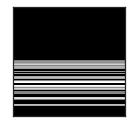

In [ ]:
data, sr = librosa.load(audio_path, sr = None, mono = True, offset = 0, duration = 0.02)
CQT = librosa.cqt(data, sr = 44100, hop_length = 1024, fmin = None, n_bins = 96, bins_per_octave = 12)
CQT_mag = librosa.magphase(CQT)[0]**4
CQTdB = librosa.core.amplitude_to_db(CQT_mag, ref = np.amax)
fig = plt.figure(figsize=(2, 2))
new_CQT = cqt_lim(CQTdB)
librosa.display.specshow(new_CQT, sr=sr, cmap='gray')
fig.savefig("/content/gdrive/MyDrive/guit_data/tests/image2.png")

In [ ]:
# setting parameters
dur = 0.02
start_list=[0]
i = 0
while i<= length:
  i +=0.02
  start_list.append(i)

In [ ]:
len(audio_file)

36

In [ ]:
len(start_list)

1248

We'll get 1248 images for this music clip

#### Create images for each audio file
named 1_1, 1_2, 1_3 where first number is the file number and second number is the picture number
Start with duration = 1 second just to try out the code

In [ ]:
# create images for this music clip

path_audio = "/content/gdrive/MyDrive/guit_data/audio/"
path_images = "/content/gdrive/MyDrive/guit_data/images/"
audio_file = sorted(os.listdir(path_audio))

In [ ]:
# loop over each file number and over each start 
# start with one frame per second to test the code

# Function for removing noise
def cqt_lim(CQT):
  new_CQT = np.copy(CQT)
  new_CQT[new_CQT < -60] = -120
  return new_CQT

for i in range(len(audio_file)):
  track_path = os.path.join(path_audio, audio_file[i])

  # load file in librosa, get length
  data, sr = librosa.load(track_path)
  length = len(data)/sr 

  # compute list of starts for the audio file
  dur = 1 
  start_list=[0]
  k = 0
  while k<length:
    k +=dur
    start_list.append(k)

  # create an image for each start of the audio file
  for j, start in enumerate(start_list[:-1]):

    # Perform the Constant-Q Transform
    data, sr = librosa.load(audio_path, sr = None, mono = True, offset = start, duration = dur)
    CQT = librosa.cqt(data, sr = 44100, hop_length = 1024, fmin = None, n_bins = 96, bins_per_octave = 12)
    CQT_mag = librosa.magphase(CQT)[0]**4
    CQTdB = librosa.core.amplitude_to_db(CQT_mag, ref = np.amax)
    new_CQT = cqt_lim(CQTdB)

    # save image
    img_name = str(i) + '_' + str(j)
    fig = plt.figure(figsize=(2, 2))
    librosa.display.specshow(new_CQT, sr=sr, cmap='gray')
    fig.savefig(path_images + img_name)

#### Get labels - Trying things

In [ ]:
pip install jams

In [ ]:
import jams
path_annotations = "/content/gdrive/MyDrive/guit_data/annotations/"
path_audio = "/content/gdrive/MyDrive/guit_data/audio/"
audio_file = sorted(os.listdir(path_audio))
annotations_file = sorted(os.listdir(path_annotations))

jam = jams.load(path_annotations + "00_Jazz3-150-C_solo.jams")

In [ ]:
track_path = os.path.join(path_audio, audio_file[0])
midi_path = os.path.join(path_annotations, annotations_file[0])
print(track_path)
print(midi_path)

/content/gdrive/MyDrive/guit_data/audio/00_BN1-129-Eb_comp_hex_cln.wav
/content/gdrive/MyDrive/guit_data/annotations/00_BN1-129-Eb_comp.jams


In [ ]:
# working with one song first
track_path = os.path.join(path_audio, audio_file[0])
midi_path = os.path.join(path_annotations, annotations_file[0])

# load file in librosa, get length
data, sr = librosa.load(track_path)
length = len(data)/sr 

# compute list of starts for the audio file
dur = 1 
start_list=[0]
k = 0
while k<length:
  k +=dur
  start_list.append(k)

# load jam file
jam = jams.load(midi_path)

# Grab all relevant MIDI data for the song (available in MIDI_dat)
# Initialize variables
cnt_row = -1
cnt_col = 0
cnt_zero = 0

for i in range(0, len(jam['annotations'])):
    if jam['annotations'][int(i)]['namespace'] == 'note_midi':
        for j in range(0, len(sorted(jam['annotations'][int(i)]['data']))):
            cnt_row = cnt_row + 1
            for k in range(0, len(sorted(jam['annotations'][int(i)]['data'])[int(j)]) - 1):
                if cnt_zero == 0:
                    MIDI_arr = np.zeros((len(sorted(jam['annotations'][int(i)]['data'])), len(sorted(jam['annotations'][int(i)]['data'])[int(j)]) - 1), dtype = np.float32)
                    cnt_zero = cnt_zero + 1
                if cnt_zero > 0:
                    MIDI_arr = np.vstack((MIDI_arr, np.zeros((len(sorted(jam['annotations'][int(i)]['data'])), len(sorted(jam['annotations'][int(i)]['data'])[int(j)]) - 1), dtype = np.float32)))
                    cnt_zero = cnt_zero + 1  # Keep
                if cnt_col > 2:
                    cnt_col = 0
                MIDI_arr[cnt_row, cnt_col] = sorted(jam['annotations'][int(i)]['data'])[int(j)][int(k)]
                cnt_col = cnt_col + 1
MIDI_dat = np.zeros((cnt_row + 1, cnt_col), dtype = np.float32)
cnt_col2 = 0
for n in range(0, cnt_row + 1):
    for m in range(0, cnt_col):
        if cnt_col2 > 2:
            cnt_col2 = 0
        MIDI_dat[n, cnt_col2] = MIDI_arr[n, cnt_col2]
        cnt_col2 = cnt_col2 + 1

In [ ]:
len(MIDI_dat)

133

In [ ]:
# time, duration, values
MIDI_dat[:10]

array([[7.4572744e+00, 4.6439910e-01, 4.4018917e+01],
       [7.9235783e+00, 9.2299318e-01, 4.4224918e+01],
       [8.8707895e+00, 1.9156462e-01, 4.4106064e+01],
       [1.4834689e+01, 4.8761904e-01, 4.6053185e+01],
       [1.5333216e+01, 1.4164172e+00, 4.6071251e+01],
       [1.7015392e+01, 1.2770975e-01, 4.4008236e+01],
       [1.7706776e+01, 5.5147392e-01, 4.3983948e+01],
       [4.8816327e-02, 4.2376417e-01, 5.1036804e+01],
       [5.1999545e-01, 4.1795918e-01, 5.1032459e+01],
       [9.4224036e-01, 8.7074828e-01, 5.1031448e+01]], dtype=float32)

In [ ]:
# create a list MIDI_val_all containing a list of unique MIDI notes played per time frame for one song.
# it uses MIDI_dat and start_list (calculated above) 

MIDI_val_all = []
for j, start in enumerate(start_list[:-1]):
  stop = start_list[j+1]
  '''
  This Returns the unique MIDI notes played (available in MIDI_val)
  Step 1: Make another file containing times + duration in 1rst column
  Step 2: Get indexes of rows where the midi file's start is between our start and stop
  Step 3: get the midi values from the corresponding indexes and build a list with unique values of them (6 max)
  '''
  # step 1
  MIDI_dat_dur = np.copy(MIDI_dat)
  for r in range(0, len(MIDI_dat[:, 0])): # for r in range(0, length of the midi time values)
      MIDI_dat_dur[r, 0] = MIDI_dat[r, 0] + MIDI_dat[r, 1] # sum of start + duration in first column
  # step 2
  tab_1, = np.where(np.logical_and(MIDI_dat[:, 0] >= start, MIDI_dat[:, 0] <= stop))
  tab_2, = np.where(np.logical_and(MIDI_dat_dur[:, 0] >= start, MIDI_dat_dur[:, 0] <= stop))
  tab_3, = np.where(np.logical_and(np.logical_and(MIDI_dat[:, 0] < start, MIDI_dat_dur[:, 0] > stop), MIDI_dat[:, 1] > int(stop-start)))

  if tab_1.size != 0 and tab_2.size == 0 and tab_3.size == 0:
      tab_ind = tab_1
  if tab_1.size == 0 and tab_2.size != 0 and tab_3.size == 0:
      tab_ind = tab_2
  if tab_1.size == 0 and tab_2.size == 0 and tab_3.size != 0:
          tab_ind = tab_3
  if tab_1.size != 0 and tab_2.size != 0 and tab_3.size == 0:
      tab_ind = np.concatenate([tab_1, tab_2])
  if tab_1.size != 0 and tab_2.size == 0 and tab_3.size != 0:
      tab_ind = np.concatenate([tab_1, tab_3])
  if tab_1.size == 0 and tab_2.size != 0 and tab_3.size != 0:
      tab_ind = np.concatenate([tab_2, tab_3])
  if tab_1.size != 0 and tab_2.size != 0 and tab_3.size != 0:
      tab_ind = np.concatenate([tab_1, tab_2, tab_3])
  if tab_1.size == 0 and tab_2.size == 0 and tab_3.size == 0:
      tab_ind = []

  # step 3
  if len(tab_ind) != 0:
      MIDI_val = np.zeros((len(tab_ind), 1), dtype = np.float32)
      for z in range(0, len(tab_ind)):
          MIDI_val[z, 0] = int(round(MIDI_dat[tab_ind[z], 2]))
  elif len(tab_ind) == 0:
      MIDI_val = []
  MIDI_val = np.unique(MIDI_val)
  if MIDI_val.size >= 6:
      MIDI_val = np.delete(MIDI_val, np.s_[6::])
  MIDI_val_all.append(MIDI_val)

In [ ]:
len(MIDI_val_all)

23

In [ ]:
MIDI_val

array([58., 62., 67., 70.], dtype=float32)

In [ ]:
# create a blueprint containing midi values on a 6*18 array

# Initialize variables
Fret = np.zeros((6, 18), dtype = np.int32)

# Retrieve all possible notes played
for q in range(0, 6):
    for e in range(0, 18):
        if q == 0:
            Fret[q, e] = 40 + e
        elif q == 1:
            Fret[q, e] = 45 + e
        elif q == 2:
            Fret[q, e] = 50 + e
        elif q == 3:
            Fret[q, e] = 55 + e
        elif q == 4:
            Fret[q, e] = 59 + e
        elif q == 5:
            Fret[q, e] = 64 + e

In [ ]:
print(Fret)

[[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57]
 [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
 [55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
 [59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76]
 [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]]


In [ ]:
# use this blueprint to create a 6*18 array for each value of the MIDI_val_all list (one 6*18 array per time frame)
# there are 1 values where the midi value is present

'''
Step 1: Create a blueprint with one's in all locations where the midi value match on the fret (stored in the Sol variable)
Append Sol to Sol_all to keep track

Step 2: 

'''

True_tabs = []
Sol_all = []

# loop over only the first MIDI_val
for MIDI_val in MIDI_val_all[:1]:
  print('MIDI_val')
  print(MIDI_val)
  # Initialize variables
  Sol = np.zeros((6, 18), dtype = np.int32)
  fcnt = -1
  fcnt2 = 0

  # Initialize variables (from following part of the code - error in the article)
  f_row = np.full((6, 6), np.inf)  # 6 strings with 1 note per string
  f_col = np.full((6, 6), np.inf)

  # Step 1 
  for t in range(0, len(MIDI_val)):
      Fret_played = (Fret == int(MIDI_val[t]))
      fcnt = fcnt + 1
      cng = 0
      for dr in range(0, len(Fret[:, 0])):
          for dc in range(0, len(Fret[0, :])):
              if Fret_played[dr, dc]*1 == 1:
                  if cng == 0:
                      fcnt2 = 0
                      cng = cng + 1
                  f_row[fcnt, fcnt2] = dr
                  f_col[fcnt, fcnt2] = dc
                  fcnt2 = fcnt2 + 1
              Fret_played[dr, dc] = Fret_played[dr, dc]*1
              if Fret_played[dr, dc] == 1:
                  Sol[dr, dc] = Fret_played[dr, dc]
  Sol_all.append(Sol)
  print('Sol')
  print(Sol)

  # finger economy

  # Initialize the 6 possible note solutions (one note per string)
  f_sol_0 = np.copy(f_col)
  f_sol_1 = np.copy(f_col)
  f_sol_2 = np.copy(f_col)
  f_sol_3 = np.copy(f_col)
  f_sol_4 = np.copy(f_col)
  f_sol_5 = np.copy(f_col)
  pri_cnt_c, = np.where(np.isfinite(f_col[0, :]))
  pri_cnt_r, = np.where(np.isfinite(f_col[:, 0]))
  if len(MIDI_val) > 1:
      for pri in range(0, len(pri_cnt_c)):
          for sub_r in range(1, 6):
              for sub_c in range(0, len(f_sol_0[0, :])):
                  if pri == 0:
                      f_sol_0[sub_r, sub_c] = abs(f_col[0, pri] - f_col[sub_r, sub_c])
                  if pri == 1:
                      f_sol_1[sub_r, sub_c] = abs(f_col[0, pri] - f_col[sub_r, sub_c])
                  if pri == 2:
                      f_sol_2[sub_r, sub_c] = abs(f_col[0, pri] - f_col[sub_r, sub_c])
                  if pri == 3:
                      f_sol_3[sub_r, sub_c] = abs(f_col[0, pri] - f_col[sub_r, sub_c])
                  if pri == 4:
                      f_sol_4[sub_r, sub_c] = abs(f_col[0, pri] - f_col[sub_r, sub_c])
                  if pri == 5:
                      f_sol_5[sub_r, sub_c] = abs(f_col[0, pri] - f_col[sub_r, sub_c])
  if len(pri_cnt_r) == 0 or len(pri_cnt_c) == 0:
      True_tab = np.copy(np.zeros((6, 18), dtype = np.int32))
  else:
      ck_sol_0 = np.zeros((len(pri_cnt_r) - 1, len(pri_cnt_c) - 1), dtype = np.int32)
      sol_ind_0 = np.copy(ck_sol_0)
      ck_sol_1 = np.zeros((len(pri_cnt_r) - 1, len(pri_cnt_c) - 1), dtype = np.int32)
      sol_ind_1 = np.copy(ck_sol_0)
      ck_sol_2 = np.zeros((len(pri_cnt_r) - 1, len(pri_cnt_c) - 1), dtype = np.int32)
      sol_ind_2 = np.copy(ck_sol_0)
      ck_sol_3 = np.zeros((len(pri_cnt_r) - 1, len(pri_cnt_c) - 1), dtype = np.int32)
      sol_ind_3 = np.copy(ck_sol_0)
      ck_sol_4 = np.zeros((len(pri_cnt_r) - 1, len(pri_cnt_c) - 1), dtype = np.int32)
      sol_ind_4 = np.copy(ck_sol_0)
      ck_sol_5 = np.zeros((len(pri_cnt_r) - 1, len(pri_cnt_c) - 1), dtype = np.int32)
      sol_ind_5 = np.copy(ck_sol_0)

  print('f_sols')
  print(f_sol_0)
  print(f_sol_1)
  print(f_sol_2)
  print(f_sol_3)
  print(f_sol_4)
  print(f_sol_5)

  # Replace infinite values with high finite values for each solution
  for ck_sol in range(0, len(pri_cnt_c)):
      for pri_sol_r in range(1, len(pri_cnt_r)):
          for pri_sol_c in range(0, len(pri_cnt_c) - 1):  # Random - 1
              if ck_sol == 0:
                  if np.any(np.isinf(f_sol_0[pri_sol_r, :])):
                      avoid_0 = np.argwhere(np.isinf(f_sol_0[pri_sol_r, :]))
                      f_sol_0[pri_sol_r, avoid_0] = 999
              if ck_sol == 1:
                  if np.any(np.isinf(f_sol_1[pri_sol_r, :])):
                      avoid_1 = np.argwhere(np.isinf(f_sol_1[pri_sol_r, :]))
                      f_sol_1[pri_sol_r, avoid_1] = 999
                  ck_sol_1[0, pri_sol_c] = min(f_sol_1[pri_sol_r, :])
              if ck_sol == 2:
                  if np.any(np.isinf(f_sol_2[pri_sol_r, :])):
                      avoid_2 = np.argwhere(np.isinf(f_sol_2[pri_sol_r, :]))
                      f_sol_2[pri_sol_r, avoid_2] = 999
                  ck_sol_2[0, pri_sol_c] = min(f_sol_2[pri_sol_r, :])
              if ck_sol == 3:
                  if np.any(np.isinf(f_sol_3[pri_sol_r, :])):
                      avoid_3 = np.argwhere(np.isinf(f_sol_3[pri_sol_r, :]))
                      f_sol_3[pri_sol_r, avoid_3] = 999
                  ck_sol_3[0, pri_sol_c] = min(f_sol_3[pri_sol_r, :])
              if ck_sol == 4:
                  if np.any(np.isinf(f_sol_4[pri_sol_r, :])):
                      avoid_4 = np.argwhere(np.isinf(f_sol_4[pri_sol_r, :]))
                      f_sol_4[pri_sol_r, avoid_4] = 999
                  ck_sol_4[0, pri_sol_c] = min(f_sol_4[pri_sol_r, :])
              if ck_sol == 5:
                  if np.any(np.isinf(f_sol_5[pri_sol_r, :])):
                      avoid_5 = np.argwhere(np.isinf(f_sol_5[pri_sol_r, :]))
                      f_sol_5[pri_sol_r, avoid_5] = 999
                  ck_sol_5[0, pri_sol_c] = min(f_sol_5[pri_sol_r, :])

  # Determine "rating" for each solution
  tab_sol_0 = np.argmin(f_sol_0, axis = 1)
  min_sol_0 = np.min(f_sol_0, axis = 1)
  if np.any(np.isinf(min_sol_0[:])):
      rep_0 = np.argwhere(np.isinf(min_sol_0[:]))
      min_sol_0[rep_0] = 0
  tab_sol_1 = np.argmin(f_sol_1, axis = 1)
  min_sol_1 = np.min(f_sol_1, axis = 1)
  if np.any(np.isinf(min_sol_1[:])):
      rep_1 = np.argwhere(np.isinf(min_sol_1[:]))
      min_sol_1[rep_1] = 0
  tab_sol_2 = np.argmin(f_sol_2, axis = 1)
  min_sol_2 = np.min(f_sol_2, axis = 1)
  if np.any(np.isinf(min_sol_2[:])):
      rep_2 = np.argwhere(np.isinf(min_sol_2[:]))
      min_sol_2[rep_2] = 0
  tab_sol_3 = np.argmin(f_sol_3, axis = 1)
  min_sol_3 = np.min(f_sol_3, axis = 1)
  if np.any(np.isinf(min_sol_3[:])):
      rep_3 = np.argwhere(np.isinf(min_sol_3[:]))
      min_sol_3[rep_3] = 0
  tab_sol_4 = np.argmin(f_sol_4, axis = 1)
  min_sol_4 = np.min(f_sol_4, axis = 1)
  if np.any(np.isinf(min_sol_4[:])):
      rep_4 = np.argwhere(np.isinf(min_sol_4[:]))
      min_sol_4[rep_4] = 0
  tab_sol_5 = np.argmin(f_sol_5, axis = 1)
  min_sol_5 = np.min(f_sol_5, axis = 1)
  if np.any(np.isinf(min_sol_5[:])):
      rep_5 = np.argwhere(np.isinf(min_sol_5[:]))
      min_sol_5[rep_5] = 0
  sol_0 = np.sum(min_sol_0[:])
  sol_1 = np.sum(min_sol_1[:])
  sol_2 = np.sum(min_sol_2[:])
  sol_3 = np.sum(min_sol_3[:])
  sol_4 = np.sum(min_sol_4[:])
  sol_5 = np.sum(min_sol_4[:])

  print('ratings')
  print(sol_0)
  print(sol_1)
  print(sol_2)
  print(sol_3)
  print(sol_4)
  print(sol_5)

  # Initalize variables
  acc_sol = False
  idx_pass = False

  # Choose best solution based on previous rating
  if len(pri_cnt_c) == 1:
      fin_sol_arr = sol_0
  if len(pri_cnt_c) == 2:
      fin_sol_arr = np.append(sol_0, sol_1)
  if len(pri_cnt_c) == 3:
      fin_sol_arr = np.append(np.append(sol_0, sol_1), sol_2)
  if len(pri_cnt_c) == 4:
      fin_sol_arr = np.append(np.append(sol_0, sol_1), np.append(sol_2, sol_3))
  if len(pri_cnt_c) == 5:
      fin_sol_arr = np.array(np.append(np.append(sol_0, sol_1), np.append(sol_2, sol_3)), sol_4)
  if len(pri_cnt_c) == 6:
      fin_sol_arr = np.array(np.append(np.append(sol_0, sol_1), np.append(sol_2, sol_3)), np.append(sol_4, sol_5))
  fin_choice = np.argmin(fin_sol_arr)
  response, ret_cnts, ret_idx = np.unique(fin_sol_arr, return_counts = True, return_index = True)
  ret_idx = [np.argwhere(idx_cnt == fin_sol_arr) for idx_cnt in np.unique(fin_sol_arr)]
  for idx_cnt_row in range(0, len(ret_idx)):
      if np.amin(response) == np.amin(fin_sol_arr) and len(ret_idx[idx_cnt_row]) > 2:
          fin_sol_arr = np.delete(fin_sol_arr, np.argwhere(np.amin(fin_sol_arr)))
  if np.amin(response) == np.amin(fin_sol_arr) and ret_cnts[np.argwhere(np.amin(fin_sol_arr))] > 2:
      fin_sol_arr = np.delete(fin_sol_arr, np.argwhere(np.amin(fin_sol_arr)))
      fin_choice = np.argmin(fin_sol_arr)

  # Choose solution and choose the next best solution if there are two notes on one string
  while acc_sol == False:
      fin_tab_row = np.zeros((len(pri_cnt_r)), dtype = np.int32)
      fin_tab_col = np.zeros((len(pri_cnt_r)), dtype = np.int32)
      if fin_choice == 0:
          fin_tab_row[0] = f_row[0, 0]
          fin_tab_col[0] = f_col[0, 0]
          for counter in range(1, len(pri_cnt_r)):
              fin_tab_row[counter] = f_row[counter, tab_sol_0[counter]]
              fin_tab_col[counter] = f_col[counter, tab_sol_0[counter]]
      if fin_choice == 1:
          fin_tab_row[0] = f_row[0, 1]
          fin_tab_col[0] = f_col[0, 1]
          for counter in range(1, len(pri_cnt_r)):
              fin_tab_row[counter] = f_row[counter, tab_sol_1[counter]]
              fin_tab_col[counter] = f_col[counter, tab_sol_1[counter]]
      if fin_choice == 2:
          fin_tab_row[0] = f_row[0, 2]
          fin_tab_col[0] = f_col[0, 2]
          for counter in range(1, len(pri_cnt_r)):
              fin_tab_row[counter] = f_row[counter, tab_sol_2[counter]]
              fin_tab_col[counter] = f_col[counter, tab_sol_2[counter]]
      if fin_choice == 3:
          fin_tab_row[0] = f_row[0, 3]
          fin_tab_col[0] = f_col[0, 3]
          for counter in range(1, len(pri_cnt_r)):
              fin_tab_row[counter] = f_row[counter, tab_sol_3[counter]]
              fin_tab_col[counter] = f_col[counter, tab_sol_3[counter]]
      if fin_choice == 4:
          fin_tab_row[0] = f_row[0, 4]
          fin_tab_col[0] = f_col[0, 4]
          for counter in range(1, len(pri_cnt_r)):
              fin_tab_row[counter] = f_row[counter, tab_sol_4[counter]]
              fin_tab_col[counter] = f_col[counter, tab_sol_4[counter]]
      if fin_choice == 5:
          fin_tab_row[0] = f_row[0, 5]
          fin_tab_col[0] = f_col[0, 5]
          for counter in range(1, len(pri_cnt_r)):
              fin_tab_row[counter] = f_row[counter, tab_sol_5[counter]]
              fin_tab_col[counter] = f_col[counter, tab_sol_5[counter]]
      acc_sol = True
      idx_cnt = [np.argwhere(uni_cnt == fin_tab_row) for uni_cnt in np.unique(fin_tab_row)]
      max_len_cnt = np.zeros((len(idx_cnt)), dtype = np.int32)
      for str_cnt_row in range(0, len(idx_cnt)):
          if len(idx_cnt[str_cnt_row]) > 1:
              fin_sol_arr = fin_sol_arr.astype('int64')
              if fin_sol_arr.size > 1:
                  fin_sol_arr = np.delete(fin_sol_arr, fin_choice)
                  idx_pass = True
                  acc_sol = False
                  break
              else:
                  continue
      fin_choice = np.argmin(fin_sol_arr)
  fin_tab_row = abs(fin_tab_row - 5)

  # Return the final tab
  True_tab = np.copy(np.zeros((6, 18), dtype = np.int32))
  for tt_cnt in range(0, len(fin_tab_col)):
      True_tab[fin_tab_row[tt_cnt], fin_tab_col[tt_cnt]] = 1

  print('True tab')
  print(True_tab)

  True_tabs.append(True_tab)

MIDI_val
[51. 58. 62. 65.]
Sol
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
f_sols
[[11.  6.  1. inf inf inf]
 [ 2.  3.  8. inf inf inf]
 [ 6.  1.  4.  8. inf inf]
 [ 4.  1.  5. 10. inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]]
[[11.  6.  1. inf inf inf]
 [ 7.  2.  3. inf inf inf]
 [11.  6.  1.  3. inf inf]
 [ 9.  4.  0.  5. inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]]
[[11.  6.  1. inf inf inf]
 [12.  7.  2. inf inf inf]
 [16. 11.  6.  2. inf inf]
 [14.  9.  5.  0. inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]]
[[11.  6.  1. inf inf inf]
 [13.  8.  3. inf inf inf]
 [17. 12.  7.  3. inf inf]
 [15. 10.  6.  1. inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]]
[[11.  6.  1. inf inf inf]
 [13.  8.  3. inf inf inf]
 [17. 12.  7.  3. inf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:204: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [ ]:
print(Fret)

[[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57]
 [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
 [55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
 [59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76]
 [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]]


In [ ]:
# make sure the solution makes sense
True_tabs[:3]

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]],
       dtype=int32),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [ ]:
MIDI_val_all[:3]

[array([51., 58., 62., 65.], dtype=float32),
 array([51., 58., 62., 65., 67.], dtype=float32),
 array([51., 58., 62., 65., 67.], dtype=float32)]

In [ ]:
print(Fret)

[[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57]
 [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
 [55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
 [59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76]
 [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]]


In [ ]:
Sol_all[:3]

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 

Notes: the following code workd only for one chors - I need to update it to get the data I need for each slice. (using MIDI+val_all)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [ ]:
True_tab

NameError: ignored

In [ ]:
while True:
  pass